## Observations and Insights

## Dependencies and starter code

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_file = "data/Mouse_metadata.csv"
study_file = "data/Study_results.csv"

# Read the mouse data and the study results
#mouse_metadata = pd.read_csv(mouse_metadata)
#study_results = pd.read_csv(study_results)

mouse_df = pd.read_csv(mouse_file)
trial_df = pd.read_csv(study_file)


# Combine the data into a single dataset
single_df = pd.merge(mouse_df, trial_df, on="Mouse ID")
single_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#mean for tumor size
tumor_mean = single_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
tumor_mean.head()


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Name: Tumor Volume (mm3), dtype: float64

In [32]:
#median for tumor size
tumor_median = single_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
tumor_median.head()

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Name: Tumor Volume (mm3), dtype: float64

In [33]:
#variance for tumor size
tumor_var = single_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
tumor_var.head()

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Name: Tumor Volume (mm3), dtype: float64

In [34]:
# sd for tumor size
tumor_sd = single_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
tumor_sd.head()

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Name: Tumor Volume (mm3), dtype: float64

In [35]:
#SEM for tumor size
tumor_sem = single_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()
tumor_sem.head()

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Name: Tumor Volume (mm3), dtype: float64

In [36]:
#summery table
summery_stats = pd.DataFrame({"Mean of Tumor Size":tumor_mean, "Median of Tumor Size":tumor_median,
                          "Variance of Tumor Size": tumor_var, "SD": tumor_sd, "SEM": tumor_sem})
summery_stats

,Mean of Tumor Size,Median of Tumor Size,Variance of Tumor Size,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [52]:
df = single_df.count()
df.index

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Bar plots

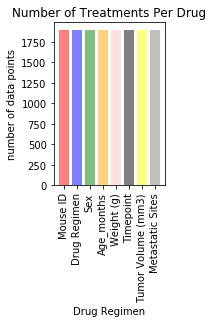

In [53]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
x_axis = df.index
tick_locations = [value for value in x_axis]
plt.figure(figsize=(2, 3))
plt.bar(x_axis, df["Mouse ID"], color=["red","blue","green","orange","pink","black","yellow","gray","purple","tan"], alpha=0.5, align="center")
plt.xticks (rotation="vertical")
plt.title("Number of Treatments Per Drug")
plt.ylabel("number of data points")
plt.xlabel("Drug Regimen")
plt.savefig("treatments.png")
plt.show()



In [56]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

## Pie plots

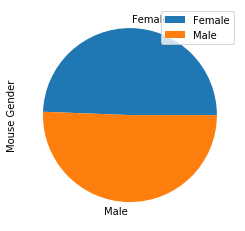

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie = single_df[["Mouse ID","Sex"]]
pie

pie = pie.set_index("Sex")
pie

pie = pie.groupby("Sex")["Mouse ID"].count()
pie

pie = pd.DataFrame({"Mouse Gender":pie})
pie

pie["Sex"] = pie.index
pie


plot = pie.plot.pie(y="Mouse Gender")
plot

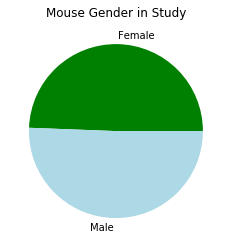

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode=(.1,0)
colors =("green","lightblue")
plt.title("Mouse Gender in Study")


plt.pie(pie["Mouse Gender"],  labels=pie["Sex"], colors=colors,
         startangle=0)

plt.show()

## Quartiles, outliers and boxplots

In [69]:
final_four = single_df[(single_df['Drug Regimen'] == 'Capomulin') | (single_df['Drug Regimen'] == 'Ramicane') | \
                 (single_df['Drug Regimen'] == 'Infubinol') | (single_df['Drug Regimen'] == 'Ceftamin')]

final_four.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [74]:
groupby_df = final_four.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max()
groupby_df.head()

df1 = final_four.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().to_frame().reset_index()

df1

,Drug Regimen,Mouse ID,Timepoint
0,Capomulin,b128,45
1,Capomulin,b742,45
2,Capomulin,f966,20
3,Capomulin,g288,45
4,Capomulin,g316,45
...,...,...,...
95,Ramicane,s508,45
96,Ramicane,u196,45
97,Ramicane,w678,5
98,Ramicane,y449,15


In [78]:
plot = pd.merge(df1, final_four, how="inner", on = ["Drug Regimen","Timepoint","Mouse ID"])
plot.head(1)

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,45,Female,9,22,38.982878,2


In [76]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
mice = single_df.groupby("Drug Regimen")["Mouse ID"].count()
mice

times = single_df.groupby(["Drug Regimen","Mouse ID"])["Timepoint","Tumor Volume (mm3)"].max()
times.head(2)


Timepoint  Tumor Volume (mm3)
Drug Regimen Mouse ID                               
Capomulin    b128             45           45.651331
             b742             45           45.000000

In [79]:
Ramicane = plot.loc[(plot["Drug Regimen"] == "Ramicane")]
Ramicane.head()

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
75,Ramicane,a411,45,Male,3,22,38.407618,1
76,Ramicane,a444,45,Female,10,25,43.047543,0
77,Ramicane,a520,45,Male,13,21,38.810366,1
78,Ramicane,a644,45,Female,7,17,32.978522,1
79,Ramicane,c458,30,Female,23,20,38.342008,2


In [80]:

quartiles = Ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Ramicane treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Final Tumor Volume in Ramicane treatment is: 31.56046955
The upper quartile of FTV is: 40.65900627
The interquartile range of FTV is: 9.098536719999998
The the median of FTV is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [88]:
Capomulin = plot.loc[(plot['Drug Regimen'] == "Capomulin")]
Capomulin.head(1)

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,45,Female,9,22,38.982878,2


In [93]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
quartiles = Capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Capomulin treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Final Tumor Volume in Capomulin treatment is: 32.37735684
The upper quartile of FTV is: 40.1592203
The interquartile range of FTV is: 7.781863460000004
The the median of FTV is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [96]:
Infubinol = plot.loc[(plot['Drug Regimen'] == "Infubinol")]
Infubinol.head()

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
50,Infubinol,a203,45,Female,20,23,67.973419,2
51,Infubinol,a251,45,Female,21,25,65.525743,1
52,Infubinol,a577,30,Female,6,25,57.031862,2
53,Infubinol,a685,45,Male,8,30,66.083066,3
54,Infubinol,c139,45,Male,11,28,72.226731,2


In [97]:
quartiles = Infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Infubinol treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Final Tumor Volume in Infubinol treatment is: 54.04860769
The upper quartile of FTV is: 65.52574285
The interquartile range of FTV is: 11.477135160000003
The the median of FTV is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [98]:
Ceftamin = plot.loc[(plot['Drug Regimen'] == "Ceftamin")]
Ceftamin.head()

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
25,Ceftamin,a275,45,Female,20,28,62.999356,3
26,Ceftamin,b447,0,Male,2,30,45.000000,0
27,Ceftamin,b487,25,Female,6,28,56.057749,1
28,Ceftamin,b759,30,Female,12,25,55.742829,1
29,Ceftamin,f436,15,Female,3,25,48.722078,2


In [99]:
quartiles = Ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Ceftamin treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Final Tumor Volume in Ceftamin treatment is: 48.72207785
The upper quartile of FTV is: 64.29983003
The interquartile range of FTV is: 15.577752179999997
The the median of FTV is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


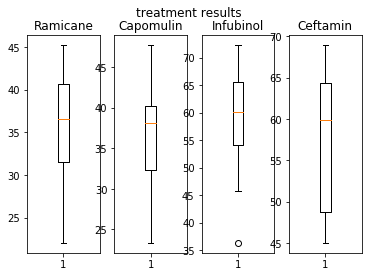

In [100]:
fig, ax = plt.subplots(1, 4)

fig.suptitle("treatment results")
ax[0].boxplot(Ramicane["Tumor Volume (mm3)"])
ax[0].set_title("Ramicane")
ax[1].boxplot(Capomulin["Tumor Volume (mm3)"])
ax[1].set_title("Capomulin")
ax[2].boxplot(Infubinol["Tumor Volume (mm3)"])
ax[2].set_title("Infubinol")
ax[3].boxplot(Ceftamin["Tumor Volume (mm3)"])
ax[3].set_title("Ceftamin")
plt.show()

## Line and scatter plots

In [103]:
Cap_Treatment = single_df.loc[(single_df["Drug Regimen"] =="Capomulin")]


Cap_Treatment.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


Text(0, 0.5, 'Tumor Volume')

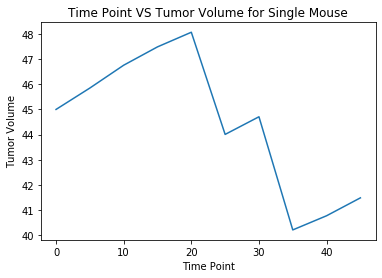

In [104]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
single_mouse = Cap_Treatment.loc[(Cap_Treatment["Mouse ID"]== "l509")]
single_mouse

plt.plot(single_mouse.Timepoint,single_mouse["Tumor Volume (mm3)"])

plt.title("Time Point VS Tumor Volume for Single Mouse")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")

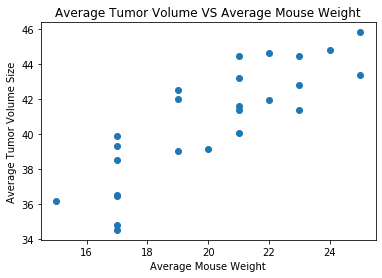

In [105]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight = Cap_Treatment.groupby("Mouse ID")["Weight (g)"].mean()
weight.head(40)

# find mean of tumor volume
mean_tum = Cap_Treatment.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mean_tum.head(30)

# make scatter plot

plt.scatter(weight,mean_tum)
plt.title("Average Tumor Volume VS Average Mouse Weight")
plt.xlabel('Average Mouse Weight')
plt.ylabel('Average Tumor Volume Size')

plt.show()

In [109]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
weight = Cap_Treatment.groupby("Mouse ID")["Weight (g)"].mean()
weight.head()

new_df = pd.DataFrame({"weight":weight,"mean_tum":mean_tum})
new_df.head()

correlation = st.pearsonr(new_df["weight"],new_df["mean_tum"])
correlation

print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


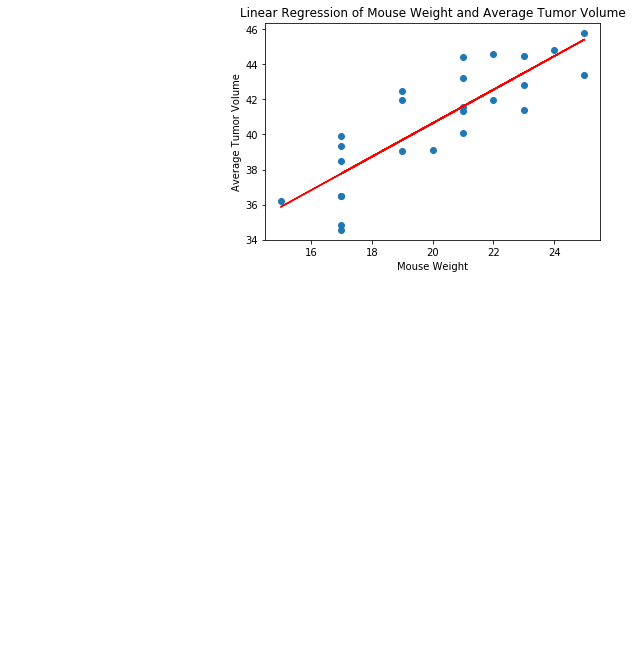

In [110]:
#Linear regression

x_values = (new_df['weight'])
y_values = (new_df['mean_tum'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title("Linear Regression of Mouse Weight and Average Tumor Volume")
plt.show()

